In [4]:
import pandas as pd

In [57]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import datetime as dt

In [135]:
# time series
from statsmodels.tsa.seasonal import seasonal_decompose

In [190]:
from statsmodels.tsa.ar_model import AutoReg

In [7]:
data = pd.read_csv("gemini_BTCUSD_day.csv")

In [8]:
data.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1.642390e+12,17/01/2022 04:00,BTCUSD,42655.12,42976.61,41559.11,42236.96,556.178715
1,1.642310e+12,16/01/2022 04:00,BTCUSD,43022.38,43499.99,42583.00,42655.12,622.078099
2,1.642220e+12,15/01/2022 04:00,BTCUSD,42947.72,43811.44,42590.52,43022.38,850.111677
3,1.642130e+12,14/01/2022 04:00,BTCUSD,42679.68,43462.53,41789.82,42947.72,800.802511
4,1.642050e+12,13/01/2022 04:00,BTCUSD,43525.85,44443.94,42326.63,42679.68,1120.790154


In [9]:
data.tail()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
2289,1.444622e+09,12/10/2015 04:00,BTCUSD,248.98,248.98,245.75,245.75,71.047743
2290,1.444536e+09,11/10/2015 04:00,BTCUSD,246.30,249.50,245.96,248.98,22.747091
2291,1.444450e+09,10/10/2015 04:00,BTCUSD,245.51,246.30,244.60,246.30,30.870549
2292,1.444363e+09,09/10/2015 04:00,BTCUSD,243.60,249.97,243.60,245.51,61.587068
2293,1.444277e+09,08/10/2015 04:00,BTCUSD,0.00,245.00,0.00,243.60,34.754703


In [10]:
data_close = data['Close']

In [11]:
data_close = data_close.values.reshape(len(data_close), 1)

In [12]:
data_date = data['Date']

In [14]:
data_date[0]

'17/01/2022 04:00'

In [76]:
len(data_date)

2294

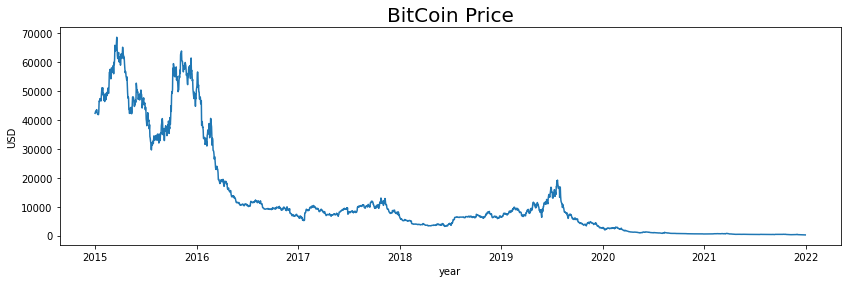

<Figure size 1008x288 with 0 Axes>

In [132]:
plt.title("BitCoin Price", fontsize=20)
plt.xlabel('year')
plt.ylabel('USD')
plt.rcParams["figure.figsize"] = (14,4)
plt.plot(data_close)
plt.xticks(np.linspace(0,len(data_date),8,endpoint=True),['2015','2016','2017','2018','2019','2020','2021','2022'])
plt.figure()
plt.show()

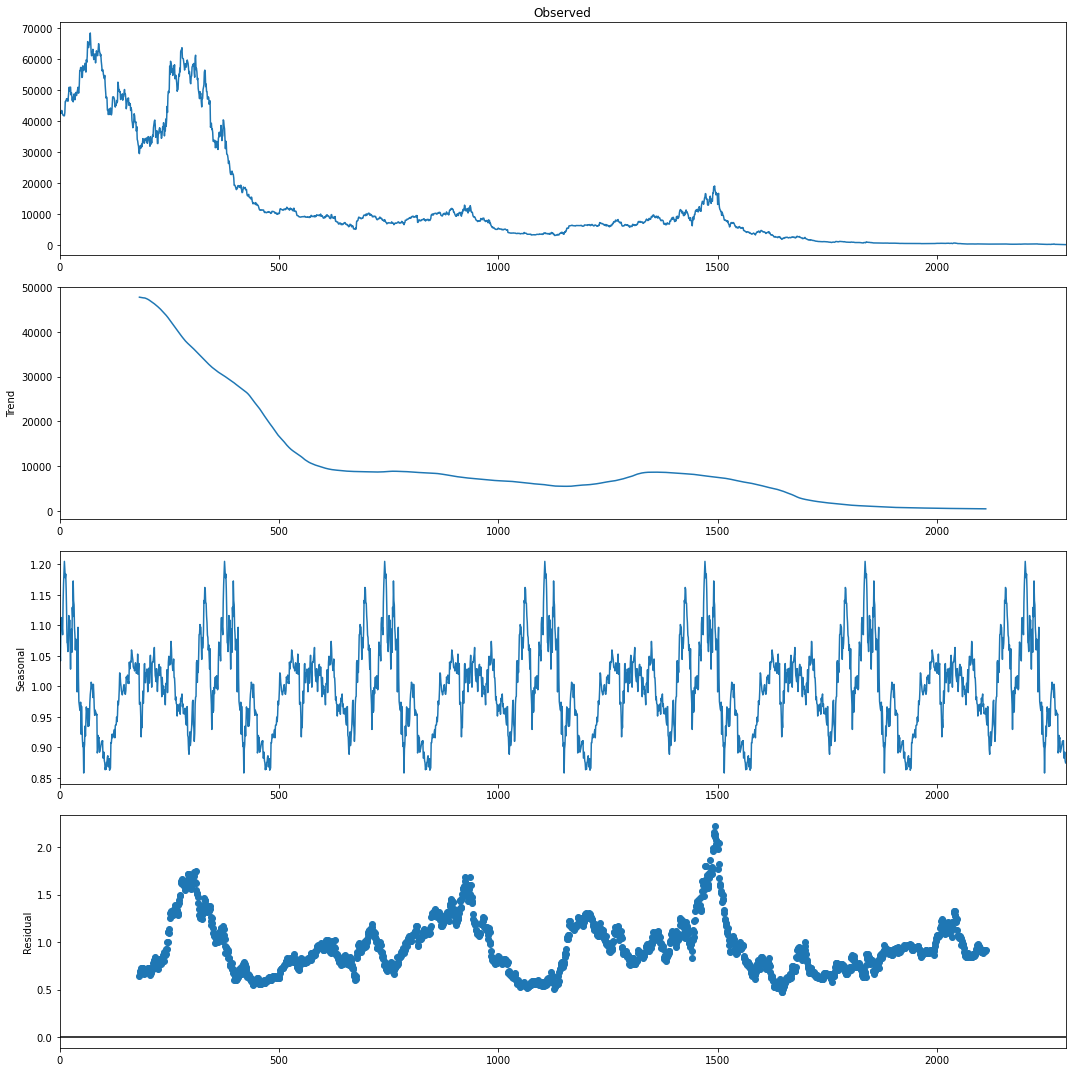

In [218]:
# Time Series:
# multiplicative Decomposition: yt = St x Tt x Et*
forecast = seasonal_decompose(data['Close'].values, 'multiplicative', period=365)
plt.rcParams.update({'figure.figsize': (15,15)})
forecast.plot()
plt.show()